# Data preparation

## Import of required libraries
Those libraries are used in the notebook to perform the data preparation. Maybee you need to install them first with `pip install <library>`.  

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
import warnings
warnings.filterwarnings('ignore')
import string
string.punctuation
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.metrics import classification_report , confusion_matrix
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oliver\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First I want to import the file

In [2]:
all_data_df = pd.read_csv('../Projectwork-master/10_datasource/cyberbullying_tweets.csv')
all_data_df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
all_data_df.shape

(47692, 2)

Now I want to have an better overview of the new dataframe. I want to check which columns are available and if they have any missing values in it.

In [4]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


I want to see the distribution of the values in the column "cyberbullying_type" as a visual. Therefore I will use the matplotlib library.

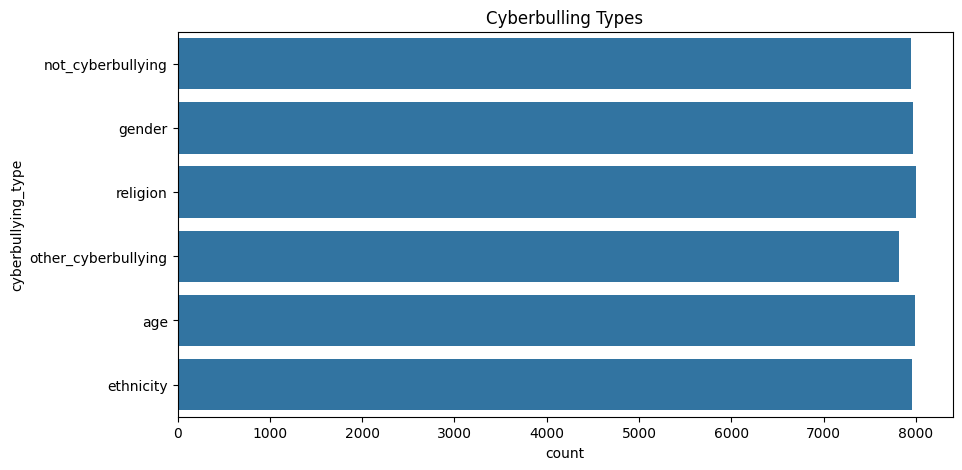

In [5]:
plt.figure(figsize = (10,5))
plt.title("Cyberbulling Types")
sns.countplot(y = "cyberbullying_type", data = all_data_df)
plt.show()

As next we should check if there are some missing values or not.

In [6]:
# Checking for null values
all_data_df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

After I have checked that there are no missing values in the dataframe.

## Text Pre-processing
In this step I will perform the text pre-processing so that I can use it afterwards to create the classification model.

### Removing punctuation
As first step I want to remove all the punctuation from the text. Therefore I will use the string library of Python, it contains some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[]^_`{|}~’.

In [7]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
all_data_df[['tweet_text']] = all_data_df[['tweet_text']].applymap(lambda x:remove_punctuation(x))
all_data_df.head()

,tweet_text,cyberbullying_type
0,In other words katandandre your food was crapi...,not_cyberbullying
1,Why is aussietv so white MKR theblock ImACeleb...,not_cyberbullying
2,XochitlSuckkks a classy whore Or more red velv...,not_cyberbullying
3,JasonGio meh P thanks for the heads up but no...,not_cyberbullying
4,RudhoeEnglish This is an ISIS account pretendi...,not_cyberbullying


### Lowering the text
It is one of the most common text preprocessing Python steps where the text is converted into the same case preferably lower case.

In [8]:
all_data_df[['tweet_text']] = all_data_df[['tweet_text']].applymap(lambda x:x.lower())
all_data_df.head()

,tweet_text,cyberbullying_type
0,in other words katandandre your food was crapi...,not_cyberbullying
1,why is aussietv so white mkr theblock imaceleb...,not_cyberbullying
2,xochitlsuckkks a classy whore or more red velv...,not_cyberbullying
3,jasongio meh p thanks for the heads up but no...,not_cyberbullying
4,rudhoeenglish this is an isis account pretendi...,not_cyberbullying


In [9]:
all_data_df.to_csv('../Projectwork-master/20_model_evaluation/20_cleaned_data.csv')

The next Notebook will be 02_data_analysis.